In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%cd /content/drive/MyDrive/CS5691_PRML/Assignment_1/

/content/drive/MyDrive/CS5691_PRML/Assignment_1


In [14]:
def comp_confmat(actual, predicted):
    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):
           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

In [15]:
class GaussianNB:
    def fit(self, X, t, id):
        self.priors = dict()
        self.means = dict()
        self.covs = dict()
        self.covar = np.cov(X, rowvar=False)
        
        self.classes = np.unique(t)
        IdMat = np.identity(X.shape[1])
        
        for c in self.classes:
            X_c = X[t == c]
            self.priors[c] = X_c.shape[0] / X.shape[0]
            self.means[c] = np.mean(X_c, axis=0)
            if id == 1:
                self.covs[c] = IdMat
            elif id == 2:
                self.covs[c] = self.covar
            else:
                self.covs[c] = np.cov(X_c, rowvar=False)

                
    def predict(self, X):
        preds = list()
        for x in X:
            posts = list()
            for c in self.classes:
                prior = np.log(self.priors[c])
                inv_cov = np.linalg.inv(self.covs[c])
                inv_cov_det = np.linalg.det(inv_cov)
                diff = x-self.means[c]
                likelihood = 0.5*np.log(inv_cov_det) - 0.5*diff.T @ inv_cov @ diff
                post = prior + likelihood
                posts.append(post)
            pred = self.classes[np.argmax(posts)]
            preds.append(pred)
        return np.array(preds)

In [16]:
# Importing the dataset
dataset2 = pd.read_csv('Q2_train_25.csv')
X1_2 = dataset2.iloc[:, 0].values
X2_2 = dataset2.iloc[:, 1].values
y_2 = dataset2.iloc[:, 2].values
Train2 = np.column_stack((X1_2, X2_2, y_2))

test2 = pd.read_csv('Q2_test_25.csv')
X1_test2 = test2.iloc[:, 0].values
X2_test2 = test2.iloc[:, 1].values
y_test2 = test2.iloc[:, 2].values
Test2 = np.column_stack((X1_test2, X2_test2, y_test2))

# Importing the dataset
dataset3 = pd.read_csv('Q3_train_25.csv')
X1_3 = dataset3.iloc[:, 0].values
X2_3 = dataset3.iloc[:, 1].values
y_3 = dataset3.iloc[:, 2].values
Train3 = np.column_stack((X1_3, X2_3, y_3))

test3 = pd.read_csv('Q3_test_25.csv')
X1_test3 = test3.iloc[:, 0].values
X2_test3 = test3.iloc[:, 1].values
y_test3 = test3.iloc[:, 2].values
Test3 = np.column_stack((X1_test3, X2_test3, y_test3))

Train Accuracy:  1.0
Test Accuracy:  0.99


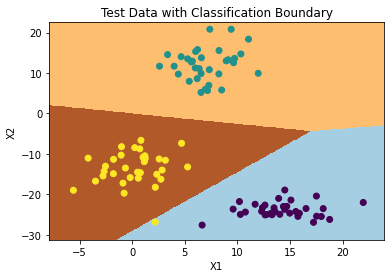

Confusion Matrix on training data:
[[167.   0.   0.]
 [  0. 167.   0.]
 [  0.   0. 166.]]
Confusion Matrix on testing data:
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 1.  0. 32.]]


In [17]:
# (a) Naive Bayes on dataset2 with covariance = I
model1 = GaussianNB()
model1.fit(Train2[:,0:2], Train2[:,2],1)
test_preds = model1.predict(Test2[:,0:2])
train_preds = model1.predict(Train2[:,0:2])
print("Train Accuracy: ", np.mean(train_preds == Train2[:,2]))
print("Test Accuracy: ", np.mean(test_preds == Test2[:,2]))

# Plot test data with classification boundary
min1 = np.min(Train2[:,0]) - 1
max1 = np.max(Train2[:,0]) + 1
min2 = np.min(Train2[:,1]) - 1
max2 = np.max(Train2[:,1]) + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1 = xx.flatten()
r2 = yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
y_hat = model1.predict(grid)
y_hat = y_hat.reshape(xx.shape)
plt.pcolormesh(xx, yy, y_hat, cmap='Paired')
plt.title('Test Data with Classification Boundary')
plt.scatter(X1_test2, X2_test2, c=y_test2 , cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Confusion matrix on train and test data
print("Confusion Matrix on training data:")
print(comp_confmat(Train2[:,2], train_preds))
print("Confusion Matrix on testing data:")
print(comp_confmat(y_test2, test_preds))

Train Accuracy:  0.792
Test Accuracy:  0.76


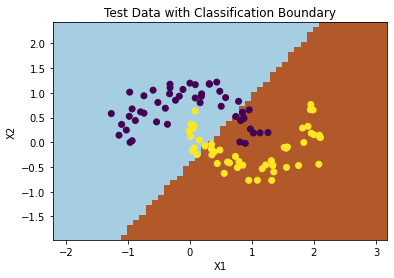

Confusion Matrix on training data:
[[199.  51.]
 [ 53. 197.]]
Confusion Matrix on testing data:
[[37. 13.]
 [11. 39.]]


In [18]:
# (b) Naive Bayes on dataset3 with covariance = I
model1 = GaussianNB()
model1.fit(Train3[:,0:2], Train3[:,2],1)
test_preds = model1.predict(Test3[:,0:2])
train_preds = model1.predict(Train3[:,0:2])
print("Train Accuracy: ", np.mean(train_preds == Train3[:,2]))
print("Test Accuracy: ", np.mean(test_preds == Test3[:,2]))

# Plot test data with classification boundary
min1 = np.min(Train3[:,0]) - 1
max1 = np.max(Train3[:,0]) + 1
min2 = np.min(Train3[:,1]) - 1
max2 = np.max(Train3[:,1]) + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1 = xx.flatten()
r2 = yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
y_hat = model1.predict(grid)
y_hat = y_hat.reshape(xx.shape)
plt.pcolormesh(xx, yy, y_hat, cmap='Paired')
plt.title('Test Data with Classification Boundary')
plt.scatter(X1_test3, X2_test3, c=y_test3 , cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Confusion matrix on train and test data
print("Confusion Matrix on training data:")
print(comp_confmat(Train3[:,2], train_preds))
print("Confusion Matrix on testing data:")
print(comp_confmat(y_test3, test_preds))

Train Accuracy:  0.994
Test Accuracy:  0.99


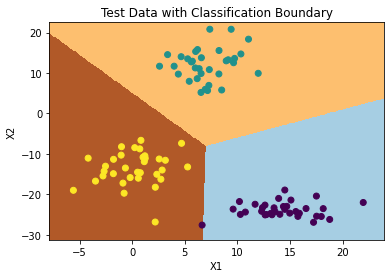

Confusion Matrix on training data:
[[164.   0.   3.]
 [  0. 167.   0.]
 [  0.   0. 166.]]
Confusion Matrix on testing data:
[[33.  0.  1.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]


In [19]:
# (c) Naive Bayes on dataset2 with covariance same for all classes(= covariance of all classes)
model2 = GaussianNB()
model2.fit(Train2[:,0:2], Train2[:,2],2)
test_preds = model2.predict(Test2[:,0:2])
train_preds = model2.predict(Train2[:,0:2])
print("Train Accuracy: ", np.mean(train_preds == Train2[:,2]))
print("Test Accuracy: ", np.mean(test_preds == Test2[:,2]))

# Plot test data with classification boundary
min1 = np.min(Train2[:,0]) - 1
max1 = np.max(Train2[:,0]) + 1
min2 = np.min(Train2[:,1]) - 1
max2 = np.max(Train2[:,1]) + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1 = xx.flatten()
r2 = yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
y_hat = model2.predict(grid)
y_hat = y_hat.reshape(xx.shape)
plt.pcolormesh(xx, yy, y_hat, cmap='Paired')
plt.scatter(X1_test2, X2_test2, c=y_test2 , cmap='viridis')
plt.title('Test Data with Classification Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Confusion matrix on train and test data
print("Confusion Matrix on training data:")
print(comp_confmat(Train2[:,2], train_preds))
print("Confusion Matrix on testing data:")
print(comp_confmat(y_test2, test_preds))

Train Accuracy:  0.876
Test Accuracy:  0.88


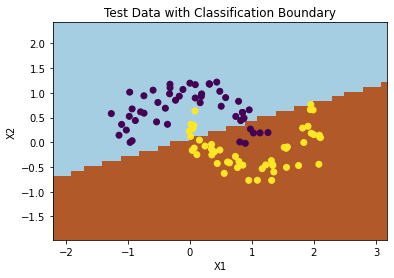

Confusion Matrix on training data:
[[219.  31.]
 [ 31. 219.]]
Confusion Matrix on testing data:
[[44.  6.]
 [ 6. 44.]]


In [20]:
# (d) Naive Bayes on dataset3 with covariance same for all classes(= covariance of all classes)
model2 = GaussianNB()
model2.fit(Train3[:,0:2], Train3[:,2],2)
test_preds = model2.predict(Test3[:,0:2])
train_preds = model2.predict(Train3[:,0:2])
print("Train Accuracy: ", np.mean(train_preds == Train3[:,2]))
print("Test Accuracy: ", np.mean(test_preds == Test3[:,2]))

# Plot test data with classification boundary
min1 = np.min(Train3[:,0]) - 1
max1 = np.max(Train3[:,0]) + 1
min2 = np.min(Train3[:,1]) - 1
max2 = np.max(Train3[:,1]) + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1 = xx.flatten()
r2 = yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
y_hat = model2.predict(grid)
y_hat = y_hat.reshape(xx.shape)
plt.pcolormesh(xx, yy, y_hat, cmap='Paired')
plt.scatter(X1_test3, X2_test3, c=y_test3 , cmap='viridis')
plt.title('Test Data with Classification Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Confusion matrix on train and test data
print("Confusion Matrix on training data:")
print(comp_confmat(Train3[:,2], train_preds))
print("Confusion Matrix on testing data:")
print(comp_confmat(y_test3, test_preds))

Train Accuracy:  1.0
Test Accuracy:  1.0


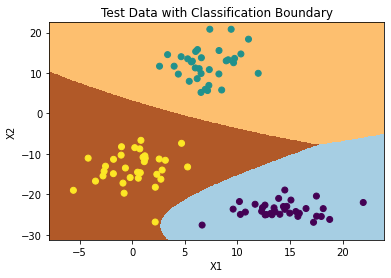

Confusion Matrix on training data:
[[167.   0.   0.]
 [  0. 167.   0.]
 [  0.   0. 166.]]
Confusion Matrix on testing data:
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]


In [21]:
# (e) Naive Bayes on dataset2 with covariance different for all classes (= covariance of that class itself)
model3 = GaussianNB()
model3.fit(Train2[:,0:2], Train2[:,2],3)
test_preds = model3.predict(Test2[:,0:2])
train_preds = model3.predict(Train2[:,0:2])
print("Train Accuracy: ", np.mean(train_preds == Train2[:,2]))
print("Test Accuracy: ", np.mean(test_preds == Test2[:,2]))

# Plot test data with classification boundary
min1 = np.min(Train2[:,0]) - 1
max1 = np.max(Train2[:,0]) + 1
min2 = np.min(Train2[:,1]) - 1
max2 = np.max(Train2[:,1]) + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1 = xx.flatten()
r2 = yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
y_hat = model3.predict(grid)
y_hat = y_hat.reshape(xx.shape)
plt.pcolormesh(xx, yy, y_hat, cmap='Paired')
plt.scatter(X1_test2, X2_test2, c=y_test2 , cmap='viridis')
plt.title('Test Data with Classification Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Confusion matrix on train and test data
print("Confusion Matrix on training data:")
print(comp_confmat(Train2[:,2], train_preds))
print("Confusion Matrix on testing data:")
print(comp_confmat(y_test2, test_preds))

Train Accuracy:  0.876
Test Accuracy:  0.87


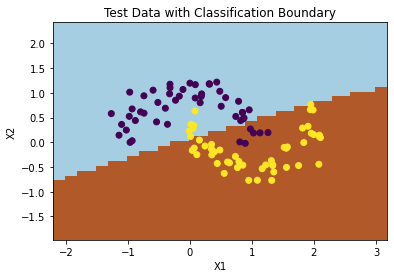

Confusion Matrix on training data:
[[220.  30.]
 [ 32. 218.]]
Confusion Matrix on testing data:
[[44.  6.]
 [ 7. 43.]]


In [22]:
# (f) Naive Bayes on dataset3 with covariance different for all classes (= covariance of that class itself)
model3 = GaussianNB()
model3.fit(Train3[:,0:2], Train3[:,2],3)
test_preds = model3.predict(Test3[:,0:2])
train_preds = model3.predict(Train3[:,0:2])
print("Train Accuracy: ", np.mean(train_preds == Train3[:,2]))
print("Test Accuracy: ", np.mean(test_preds == Test3[:,2]))

# Plot test data with classification boundary
min1 = np.min(Train3[:,0]) - 1
max1 = np.max(Train3[:,0]) + 1
min2 = np.min(Train3[:,1]) - 1
max2 = np.max(Train3[:,1]) + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1 = xx.flatten()
r2 = yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
y_hat = model3.predict(grid)
y_hat = y_hat.reshape(xx.shape)
plt.pcolormesh(xx, yy, y_hat, cmap='Paired')
plt.scatter(X1_test3, X2_test3, c=y_test3 , cmap='viridis')
plt.title('Test Data with Classification Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Confusion matrix on train and test data
print("Confusion Matrix on training data:")
print(comp_confmat(Train3[:,2], train_preds))
print("Confusion Matrix on testing data:")
print(comp_confmat(y_test3, test_preds))